### Este capítulo vai mostrar alguns joins com strings e como transformar várias valores diferentes de uma string em um único formato

In [3]:
import pandas as pd
from fuzzywuzzy import fuzz

C:\Users\alber\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Podemos comparar duas string e calcular a similaridade. Esse valor varia de 0 a 100

In [4]:
fuzz.WRatio('Reeding', 'Reading')

86

In [5]:
fuzz.WRatio('Houston Rockets', 'Rockets')

90

In [6]:
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')

86

### Podemos criar array com algumas possibilidades e colocar as top N com maiores similidades com alguma string específica

In [7]:
from fuzzywuzzy import process

In [14]:
string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',
'Houson vs Los Angeles', 'Maça e Laranja', "Amazonia"])
process.extract(string, choices, limit = 5)

[('Rockets vs Lakers', 86, 0),
 ('Lakers vs Rockets', 86, 1),
 ('Houson vs Los Angeles', 86, 2),
 ('Maça e Laranja', 39, 3),
 ('Amazonia', 32, 4)]

### Podemos usar a função process.extract para agruparmos vários valores de string em uma única.

Por exemplo:
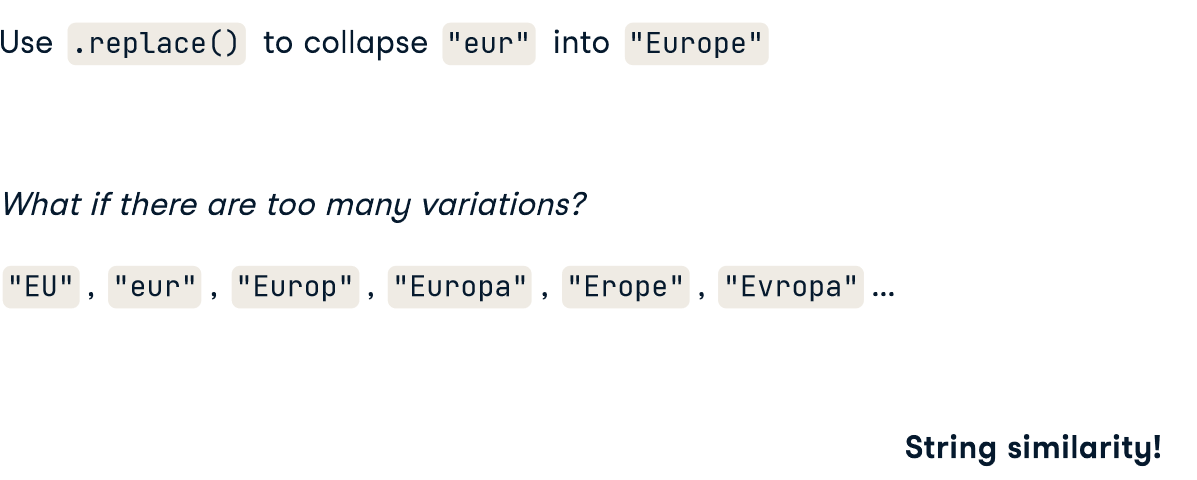

In [18]:
dados=pd.DataFrame({"var": ["California",
 "Cali",
 "Calefornia",
 "Calefornie",
 "Californie",
 "Calfornia",
 "Calefernia",
 "New York",
"New York City"]})
dados

,var
0,California
1,Cali
2,Calefornia
3,Calefornie
4,Californie
5,Calfornia
6,Calefernia
7,New York
8,New York City


In [19]:
categories=pd.DataFrame({"var": ["California", "New York"]})
categories

,var
0,California
1,New York


### Logo podemos usar essa similiridade para agrupar diferentes valores em um único transformando o conjunto de dados original em um dos valores de categories

In [21]:
for category in categories['var']:
# Find potential matches in states with typoes
    matches = process.extract(category, dados['var'], limit = dados.shape[0])
    # For each potential match match
    for potential_match in matches:
    # If high similarity score
        print(category, potential_match)

California ('California', 100, 0)
California ('Calfornia', 95, 5)
California ('Cali', 90, 1)
California ('Calefornia', 90, 2)
California ('Californie', 90, 4)
California ('Calefornie', 80, 3)
California ('Calefernia', 80, 6)
California ('New York City', 33, 8)
California ('New York', 22, 7)
New York ('New York', 100, 7)
New York ('New York City', 90, 8)
New York ('Calefornia', 33, 2)
New York ('Calefornie', 33, 3)
New York ('Calfornia', 24, 5)
New York ('California', 22, 0)
New York ('Californie', 22, 4)
New York ('Calefernia', 11, 6)
New York ('Cali', 0, 1)


In [24]:
for category in categories['var']:
# Find potential matches in states with typoes
    matches = process.extract(category, dados['var'], limit = dados.shape[0])
    # For each potential match match
    for potential_match in matches:
    # If high similarity score
        if potential_match[1] >= 80:
# Replace typo with correct category
            dados.loc[dados['var'] == potential_match[0], 'var'] = category

In [25]:
dados["var"].unique()

array(['California', 'New York'], dtype=object)

### Record linkage
#### Record linkage é o processo de unir dois data frames em que não temos uma chave que identifica cada observação dos dois conjuntos de dados

## Ver pdf do datacamp